In [19]:
# Use Random forest to prepare a model on fraud data

# treating those who have taxable_income <= 30000 as Risky and others are Good

In [62]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [63]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn import preprocessing

In [64]:
df=pd.read_csv('Fraud_check.csv')
df.rename(columns={'Taxable.Income':'Taxable_income'},inplace=True)
df 

,Undergrad,Marital.Status,Taxable_income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable_income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


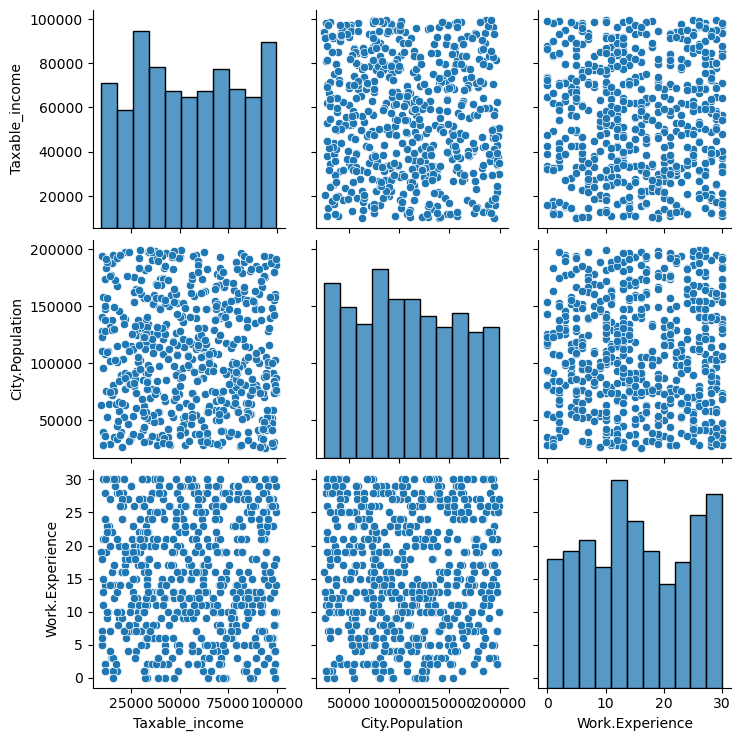

In [66]:
sns.pairplot(df)

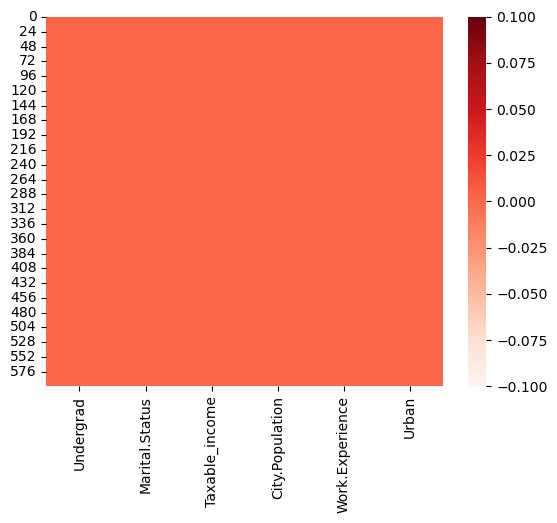

In [67]:
sns.heatmap(df.isnull(),cmap='Reds')
plt.show()

<AxesSubplot:>

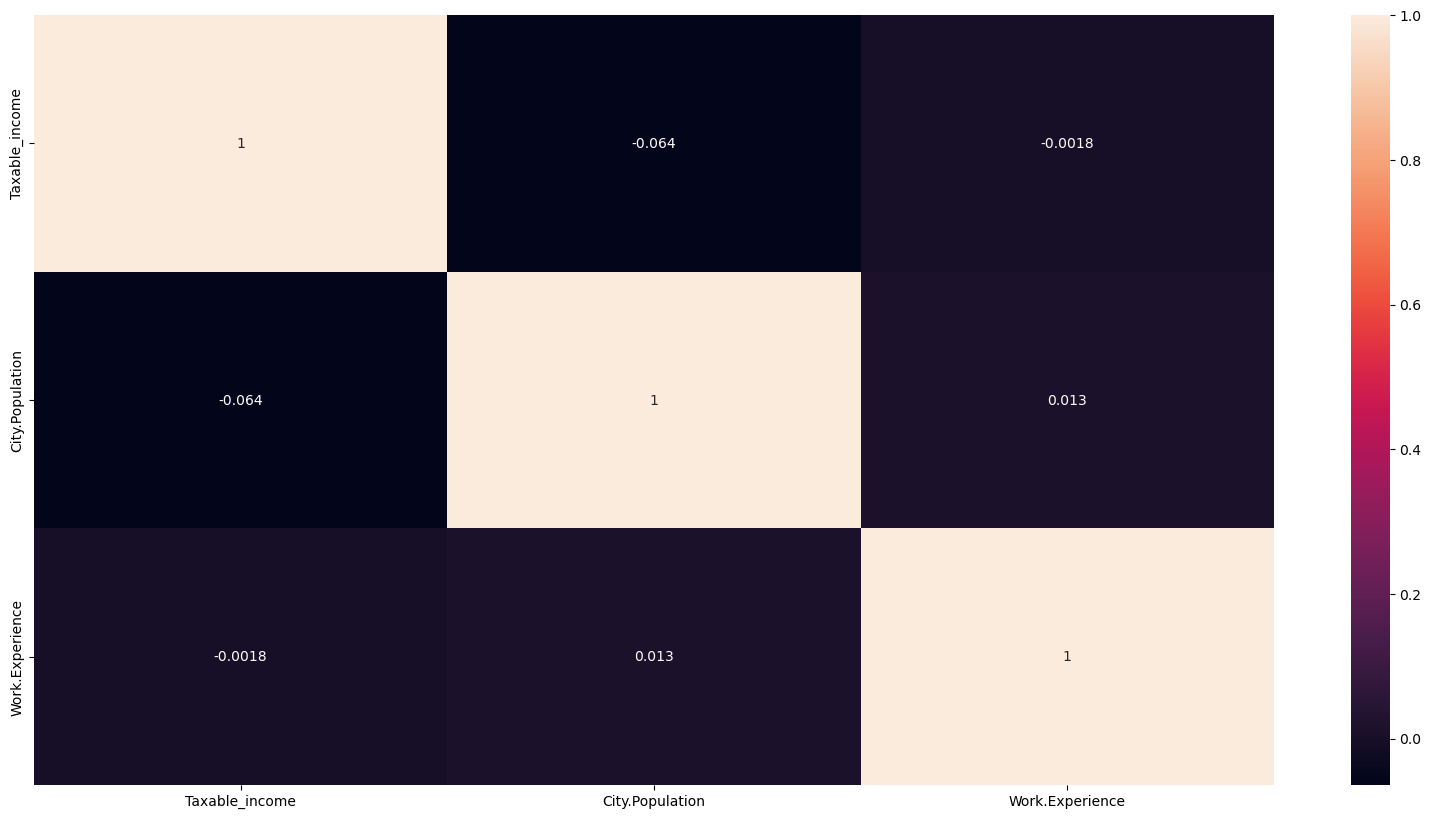

In [68]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True)

In [69]:
label_encoder = preprocessing.LabelEncoder()
df['Undergrad']= label_encoder.fit_transform(df['Undergrad'])
df['Urban']= label_encoder.fit_transform(df['Urban'])
df['Marital.Status']= label_encoder.fit_transform(df['Marital.Status'])

In [70]:
df

,Undergrad,Marital.Status,Taxable_income,City.Population,Work.Experience,Urban
0,0,2,68833,50047,10,1
1,1,0,33700,134075,18,1
2,0,1,36925,160205,30,1
3,1,2,50190,193264,15,1
4,0,1,81002,27533,28,0
...,...,...,...,...,...,...
595,1,0,76340,39492,7,1
596,1,0,69967,55369,2,1
597,0,0,47334,154058,0,1
598,1,1,98592,180083,17,0


In [71]:
df['Taxable_income'] = df['Taxable_income'].apply(lambda Income: 'Risky' if Income <= 30000 else 'Good')
df['Taxable_income']= label_encoder.fit_transform(df['Taxable_income'])
#df.rename(columns={'Taxable.Income':'Taxable_income'})
df 

,Undergrad,Marital.Status,Taxable_income,City.Population,Work.Experience,Urban
0,0,2,0,50047,10,1
1,1,0,0,134075,18,1
2,0,1,0,160205,30,1
3,1,2,0,193264,15,1
4,0,1,0,27533,28,0
...,...,...,...,...,...,...
595,1,0,0,39492,7,1
596,1,0,0,55369,2,1
597,0,0,0,154058,0,1
598,1,1,0,180083,17,0


In [72]:
df.Taxable_income.unique()

array([0, 1])

In [73]:
x=df.iloc[:,0:4]
y=df['Taxable_income']

# Bagging Decision Tree for Classification

In [74]:
num_trees = 100
seed=8
kfold = KFold(n_splits=100, shuffle = True, random_state=seed)
model = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
results = cross_val_score(model, x,y, cv=kfold)
print(results.mean())

1.0


# Stacking Ensemble for classification

In [75]:
kfold = KFold(n_splits=10,shuffle=True, random_state=8)
estimators = []
model1 = LogisticRegression(max_iter=100)                          # creating the sub models
estimators.append(('logistic', model1))
model2 = DecisionTreeClassifier()
estimators.append(('cart', model2))
model3 = SVC()
estimators.append(('svm', model3))
ensemble = VotingClassifier(estimators)                            # creating the ensemble model
results = cross_val_score(ensemble, x, y, cv=kfold)
print(results.mean())

0.8099999999999999


# Random Forest Classification


In [76]:
num_trees = 100
max_features = 3
kfold = KFold(n_splits=10, shuffle= True ,random_state=8)
model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
results = cross_val_score(model, x, y, cv=kfold)
print(results.mean())

1.0


# Boost Classification


In [77]:
num_trees = 100
seed= 8
kfold = KFold(n_splits=400, shuffle = True, random_state=seed)
model = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
results = cross_val_score(model, x,y, cv=kfold)
print(results.mean())

1.0
